# Работа с данными через Google

In [1]:
# Монтирует google disk в colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

url = os.chdir(r"/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/НТО-23")
os.getcwd()

'/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/НТО-23'

In [3]:
os.listdir()

['sample_submit.csv',
 'test.csv',
 'train.csv',
 'data',
 'logs',
 'last.hdf5',
 'best.hdf5',
 'submit.csv']

In [ ]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns

RANDOM_SEED = 42
NUM_CLASSES = 5

In [ ]:
for i in tqdm(range(0, 10)):
    x = 1+  1

100%|██████████| 10/10 [00:00<00:00, 58254.22it/s]


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,имя файла данных,Folder Path,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5)
0,raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv,кинетический тремор,мужской,52,off,1
1,raw_data_bdcba44f-0d6a-11ed-8857-b6da2cf29e9d.csv,Постуральный тремор,мужской,78,on,0
2,raw_data_750c0f09-b09a-11ec-9699-58a023d3f6d9.csv,Постуральный тремор,мужской,71,on,0
3,raw_data_d90846c3-3969-11ed-a96d-b469216ca443.csv,кулак,мужской,23,off,1
4,raw_data_c27fbeb3-1882-11ed-95c1-b469216ca443.csv,кинетический тремор,мужской,23,off,2


In [ ]:
pd.read_csv('data/raw_data_c27fbeb3-1882-11ed-95c1-b469216ca443.csv')

,WRIST.x,WRIST.y,WRIST.z,THUMB_CMC.x,THUMB_CMC.y,THUMB_CMC.z,THUMB_MCP.x,THUMB_MCP.y,THUMB_MCP.z,THUMB_IP.x,...,PINKY_PIP.x,PINKY_PIP.y,PINKY_PIP.z,PINKY_DIP.x,PINKY_DIP.y,PINKY_DIP.z,PINKY_TIP.x,PINKY_TIP.y,PINKY_TIP.z,TIME
0,0.580012,0.381588,0.0,0.569963,0.352888,0.000850,0.570323,0.323395,-0.000514,0.572875,...,0.621135,0.340412,-0.016023,0.628157,0.329640,-0.017122,0.633952,0.319700,-0.017753,0.217937
1,0.578038,0.382198,0.0,0.569523,0.352985,0.001608,0.570949,0.323861,0.000361,0.573896,...,0.620606,0.344405,-0.017617,0.627957,0.333680,-0.018585,0.633888,0.323697,-0.019185,0.265342
2,0.574641,0.389015,0.0,0.571048,0.359855,0.001789,0.575604,0.328831,0.000052,0.578999,...,0.616484,0.359773,-0.023812,0.624629,0.350431,-0.025077,0.631452,0.342167,-0.025993,0.307203
3,0.572966,0.396787,0.0,0.572498,0.366861,0.001349,0.578608,0.336290,-0.001040,0.583292,...,0.613972,0.370425,-0.026064,0.622908,0.360959,-0.026908,0.630128,0.352821,-0.027361,0.359663
4,0.569985,0.406046,0.0,0.575339,0.376684,0.002466,0.584947,0.352084,-0.000483,0.592850,...,0.604978,0.398519,-0.033735,0.614064,0.391099,-0.034243,0.621503,0.384743,-0.034416,0.407287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.562033,0.460071,0.0,0.574987,0.436686,0.003056,0.590769,0.419330,0.001221,0.602325,...,0.597389,0.478214,-0.027642,0.606264,0.478757,-0.028310,0.614121,0.479091,-0.028715,20.302154
332,0.558597,0.472432,0.0,0.572765,0.453736,0.001258,0.590358,0.441046,-0.001470,0.602823,...,0.586562,0.506201,-0.031786,0.593926,0.512483,-0.032788,0.600969,0.517347,-0.033149,20.342017
333,0.555880,0.489198,0.0,0.570637,0.469265,0.000789,0.588389,0.455002,-0.002097,0.600766,...,0.582657,0.525039,-0.029677,0.589259,0.530527,-0.030547,0.595530,0.535121,-0.030909,20.392949
334,0.554773,0.506248,0.0,0.570483,0.486937,-0.000414,0.587558,0.476419,-0.003958,0.598276,...,0.568356,0.546777,-0.030534,0.573484,0.557244,-0.031023,0.578546,0.565843,-0.031002,20.443702


## EDA

Explorary Data Analys - исследование данных

In [ ]:
paths_to_tabels = glob('data/*')
lengths = []

td = []
td_mean = []

for table in tqdm(paths_to_tabels):
    df = pd.read_csv(table)
    lengths.append(df.shape[0])
    td.append(df.TIME.to_list())
    td[-1] = [td[-1][i + 1] - td[-1][i] for i in range(len(td[-1]) - 1)]
    td_mean.append(np.mean(td[-1]))


print('Mean FPS:', 1/np.mean(td_mean))

100%|██████████| 1214/1214 [00:32<00:00, 37.19it/s]

Mean FPS: 18.778429369227737


In [ ]:
max(lengths)
min(lengths)

27

In [ ]:
names = [f'<{i*100}' for i in range(1, 11)]
snames = [f'<{i*10}' for i in range(1, 11)]
count = [0]*10
small_count = [0]*10

for i in lengths:
    count[i//100] += 1
    if i < 100:
        small_count[i//10] += 1

scount = sum(count)
lbls = [f'{i/scount*100:.1f}%({i})' for i in count]

sscount = sum(small_count)
slbls = [f'{i/sscount*100:.1f}%({i})' for i in small_count]

plt.style.use("bmh")

In [ ]:
snames

['<10', '<20', '<30', '<40', '<50', '<60', '<70', '<80', '<90', '<100']

Проверим длинну наших записей

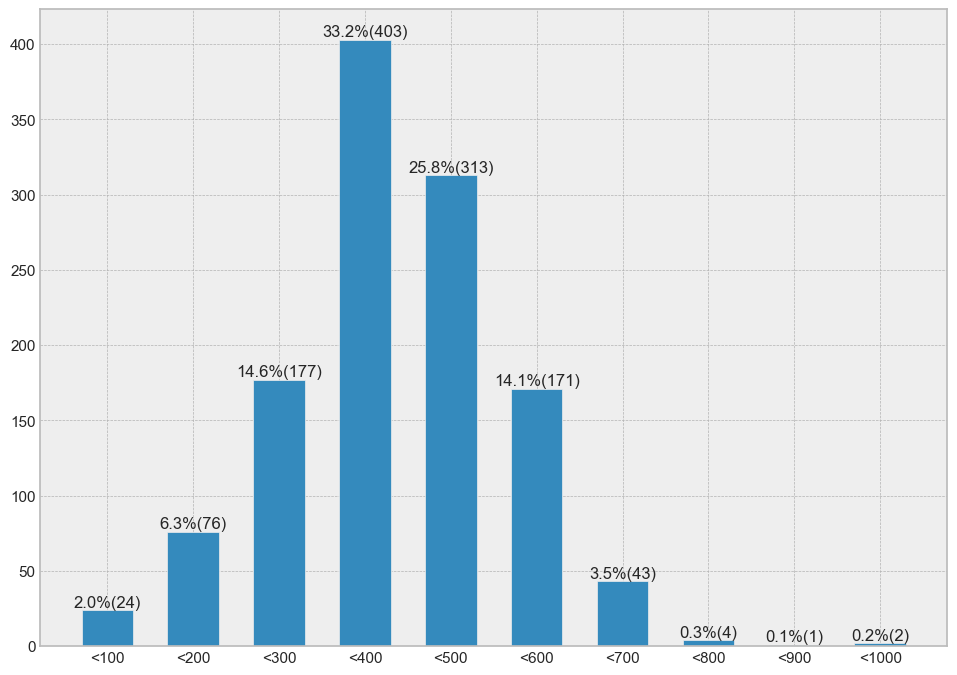

In [ ]:
rects = plt.bar(names, count, width=0.6)
txt = plt.bar_label(rects, padding=0, labels=lbls)

In [ ]:
df_meta = pd.read_csv('train.csv')

Классы по процентам

In [ ]:
df_meta['Folder Path'].value_counts()

Постуральный тремор           215
кулак                         199
постукивание пальцами         196
кинетический тремор           162
Пронация и супинация кисти     61
Name: Folder Path, dtype: int64

In [ ]:
df_meta['Folder Path'].value_counts()/df_meta.shape[0]*100

Постуральный тремор           25.810324
кулак                         23.889556
постукивание пальцами         23.529412
кинетический тремор           19.447779
Пронация и супинация кисти     7.322929
Name: Folder Path, dtype: float64

Гистограмма возрастов

<Axes: xlabel='полных лет', ylabel='count'>

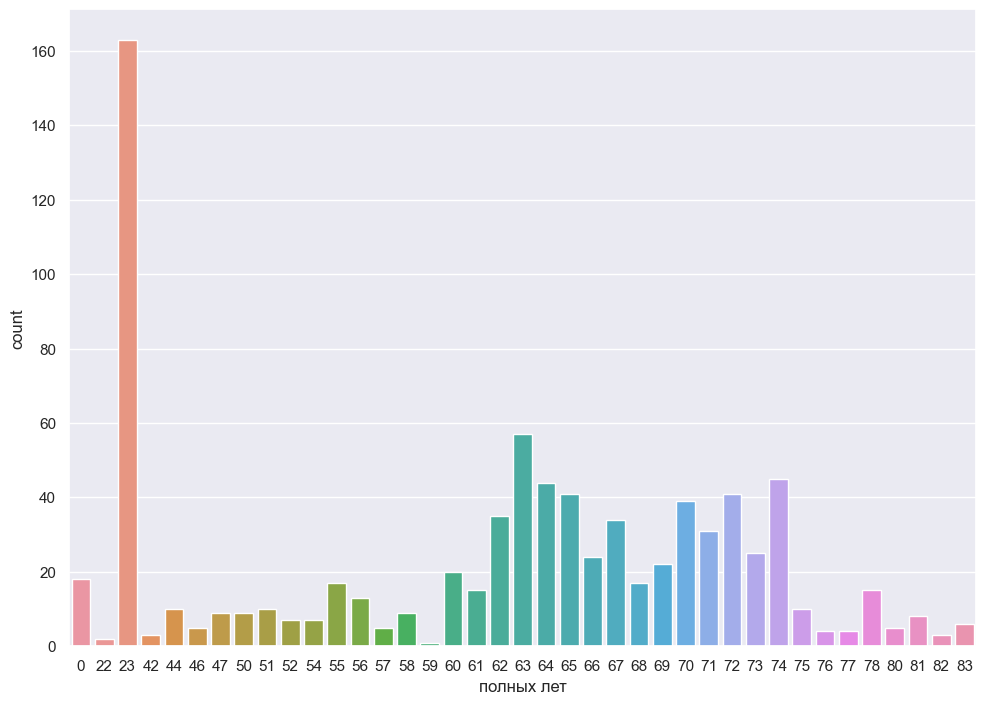

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=df_meta, x='полных лет', order=df_meta['полных лет'].value_counts().index.sort_values())

Распределение полов (в процентах)

In [ ]:
df_meta['пол'].value_counts()

мужской    453
женский    362
0           18
Name: пол, dtype: int64

In [ ]:
df_meta['пол'].value_counts()/df_meta.shape[0]*100

мужской    54.381753
женский    43.457383
0           2.160864
Name: пол, dtype: float64

Состояние нейростимуляторов (в процентах)

In [ ]:
df_meta['пациент off/on'].value_counts()/df_meta.shape[0]*100

off    58.463385
on     41.536615
Name: пациент off/on, dtype: float64

Степень по UPDRS

<Axes: >

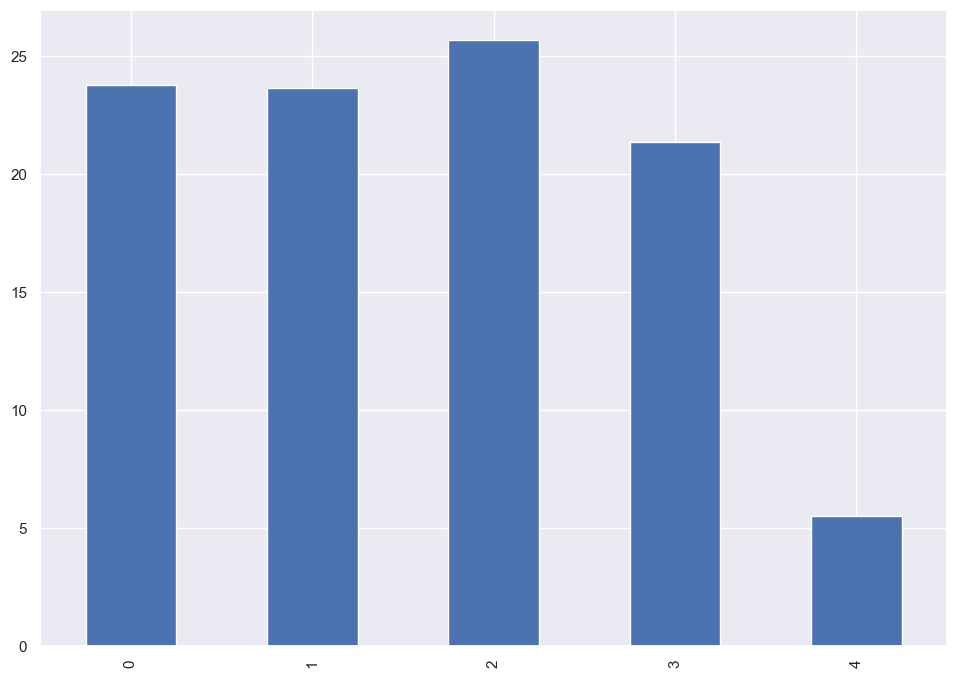

In [ ]:
(df_meta['определенный диагноз врачом (0-5)'].value_counts().sort_index()/df_meta.shape[0]*100).plot(kind='bar')

In [ ]:
df_meta[df_meta['определенный диагноз врачом (0-5)'] == 4]

,имя файла данных,Folder Path,пол,полных лет,пациент off/on,определенный диагноз врачом (0-5)
50,raw_data_cdfac98d-21e7-11ed-a6ab-b469216ca443.csv,кулак,женский,23,off,4
55,raw_data_9d748669-b6da-11ec-97f6-58a023d3f6d9.csv,Пронация и супинация кисти,мужской,72,on,4
85,raw_data_4d6b5173-3969-11ed-820f-b469216ca443.csv,Пронация и супинация кисти,мужской,23,off,4
106,raw_data_146f201f-2667-11ed-8582-b474d352caff.csv,кулак,женский,62,off,4
122,raw_data_17238d6a-a99a-11ec-9a82-58a023d3f6d9.csv,Пронация и супинация кисти,мужской,63,on,4
146,raw_data_19c7d69f-a988-11ec-8b2d-58a023d3f6d9.csv,постукивание пальцами,женский,74,on,4
151,raw_data_503c38ab-2668-11ed-9f59-b474d352caff.csv,Пронация и супинация кисти,женский,62,off,4
173,raw_data_25cc90af-e0be-11ec-a271-e82aea2c97f4.csv,Постуральный тремор,мужской,64,off,4
181,raw_data_035dfb31-6fd9-11ed-a0e0-e82aea2c97f4.csv,постукивание пальцами,мужской,63,on,4
188,raw_data_437f4173-ae7b-11ec-94ca-b469216ca443.csv,Пронация и супинация кисти,женский,23,off,4


## Data preprocessing

Подготовка данных. В первой ячейке формируем вектора для тренировок

In [ ]:
meta_data.loc[0]

имя файла данных                     raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv
Folder Path                                                        кинетический тремор
пол                                                                            мужской
полных лет                                                                          52
пациент off/on                                                                     off
определенный диагноз врачом (0-5)                                                    1
Name: 0, dtype: object

In [ ]:
meta_data = pd.read_csv('train.csv')
moves = []
classes = []
gender = {'мужской': 1, 'женский': 0, '0': 2}
class_num = {meta_data['Folder Path'].unique()[i]: i  for i in range(5)}

for i in tqdm(range(meta_data.shape[0])):
    temporary_data = pd.read_csv('data/' + meta_data['имя файла данных'][i])
    temporary_meta = meta_data[['пол', 'полных лет', 'пациент off/on', 'определенный диагноз врачом (0-5)', 'Folder Path']][meta_data.index == i].values[0]
    temporary_gender = gender[temporary_meta[0]]
    classes.append(class_num[temporary_meta[4]])
    print(temporary_data[:100].drop('TIME', axis=1).values.reshape(-1).shape)
    moves.append(np.append(temporary_data[:100].drop('TIME', axis=1).values.reshape(-1), [temporary_gender, temporary_meta[1], int(temporary_meta[2] == 'on'), temporary_meta[3]]))
    print(moves[0].shape)

In [ ]:
# padding - делаем одинаковую длинну

# 1. Обрезать не до 100, до самого минимального: lenght
# 2. Дополнить массив или вектор до размера максимального, заполнив недостоющие значения 0

# y = w*x1 + w*0

# 'Hello world' - [113, 453, 0, 0]
# 'Buy my dear friend' - [474, 8, 23, 10]

In [ ]:
np.array([[1,2], [5,2]]).flatten()

array([1, 2, 5, 2])

In [ ]:
np.array([[1,2], [5,2]]).reshape(-1)

array([1, 2, 5, 2])

In [ ]:
tmp = pd.read_csv('data/raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv')

In [ ]:
tmp.mean(axis=1)

In [ ]:
# 1 - стек из кадром
# [
#     [
#         [[]],
#         [[]],
#         ...
#     ],
#     [
#         [[]],
#         [[]],
#         ...
#     ],
# ...
# ]

In [ ]:
# pd.read_csv('data/raw_data_d786d645-db38-11ec-b494-e82aea2c97f4.csv')
# 324*64
100*63

6300

In [ ]:
len(moves[0])

6304

In [ ]:
moves[0]

array([ 0.5185796 ,  0.41892567,  0.        , ..., 52.        ,
        0.        ,  1.        ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(moves), np.asarray(classes), train_size=0.75, random_state=RANDOM_SEED)

## Train

Инициализируем модель и настраиваем колбеки

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 12.2 MB/s eta 0:00:00


In [ ]:
import catboost

In [ ]:
# 1. Предобатка данных
# - убрать 0 у пола
# кодировки
# масштабирование
# усреднения колонок
# балансировка - smote

# 2.Попробовать другие модели
# Catboost()
# XGBboost()
# RandomForest()
#
# Изменить архитекуту нейронной сети

In [ ]:
from keras.src.layers.normalization.batch_normalization import BatchNormalization
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 3 * 100 + 4, )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

BatchNormalization()

In [ ]:
model_save_path = 'last.hdf5'
best_model_save_path = 'best.hdf5'

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False) #сохранение каждой первой эпохи

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=150, verbose=1)
#остановка, если на 150 эпохах метрика на валидации не растёт

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=best_model_save_path,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True) #сохранение лучшей эпохи

tb_callback = tf.keras.callbacks.TensorBoard('./logs', update_freq=1) #инициализация tensorboard

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
) #сборка модели с оптимизатором Adam и метрикой accuracy

Запускаем обучение

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=1024,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback, tb_callback, model_checkpoint_callback]
)

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 1.6297 - accuracy: 0.2388
Epoch 1: saving model to last.hdf5
1/1 [==============================] - 2s 2s/step - loss: 1.6297 - accuracy: 0.2388 - val_loss: 3.8951 - val_accuracy: 0.2679
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - ETA: 0s - loss: 3.9394 - accuracy: 0.2548
Epoch 2: saving model to last.hdf5
1/1 [==============================] - 0s 203ms/step - loss: 3.9394 - accuracy: 0.2548 - val_loss: 1.7755 - val_accuracy: 0.2679
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 1.8586 - accuracy: 0.2420
Epoch 3: saving model to last.hdf5
1/1 [==============================] - 0s 182ms/step - loss: 1.8586 - accuracy: 0.2420 - val_loss: 1.7805 - val_accuracy: 0.0622
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 1.8188 - accuracy: 0.0929
Epoch 4: saving model to last.hdf5
1/1 [==============================] - 0s 171ms/step - loss: 1.8188 - accuracy: 0.0929 - val_loss: 1.6442 - val_accuracy: 0.2679
Epoch 5/200
1/1 [==============================] - ETA: 0s - loss: 1.7394 - accuracy: 0.2356
Epoch 5: saving model to last.hdf5
1/1 [==============================] - 0s 159ms/step - loss: 1.7394 - accuracy: 0.2356 - val_loss: 1.6045 - val_a

## Test

Выгрузка ответов

In [ ]:
model = tf.keras.models.load_model('best.hdf5')

test_data = pd.read_csv('test.csv')
test_classes = []

num_to_class = {class_num[i] : i  for i in class_num.keys()}

preds = []

for i in tqdm(range(test_data.shape[0])):
    temporary_data = pd.read_csv('data/' + meta_data['имя файла данных'][i])
    temporary_meta = test_data[['пол', 'полных лет', 'пациент off/on', 'определенный диагноз врачом (0-5)']][test_data.index == i].values[0]
    temporary_gender = gender[temporary_meta[0]]
    data_to_test = np.append(temporary_data[:100].drop('TIME', axis=1).values.reshape(-1), [temporary_gender, temporary_meta[1], int(temporary_meta[2] == 'on'), temporary_meta[3]])
    pred = model.predict(np.array([data_to_test]), verbose=False)
    preds.append(num_to_class[np.argmax(np.squeeze(pred))])

submit_to_send = pd.DataFrame({'path': test_data['имя файла данных'], 'pred': preds})
submit_to_send.to_csv('submit.csv', index=False)

100%|██████████| 357/357 [00:47<00:00,  7.55it/s]


In [ ]:
class_num = {meta_data['Folder Path'].unique()[i]: i  for i in range(5)}
class_num

{'кинетический тремор': 0,
 'Постуральный тремор': 1,
 'кулак': 2,
 'постукивание пальцами': 3,
 'Пронация и супинация кисти': 4}

In [ ]:
pred = model.predict(X_test, verbose=False)

y_pred = np.argmax(pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
# print(f'precision: {precision(y_test,y_pred)}')
# print(f'recall: {recall(y_test,y_pred)}')
# print(f'f1_score: {f1_score(y_test,y_pred)}')

Accuracy: 0.6555023923444976


<Axes: >

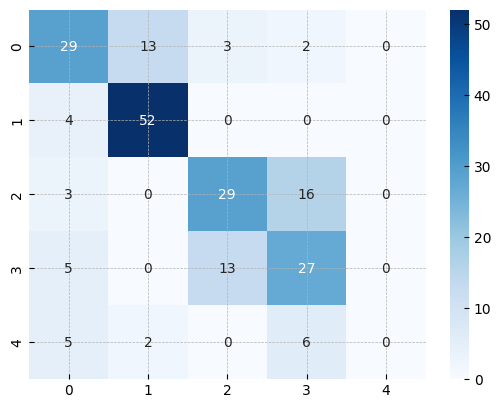

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=True)

In [ ]:
submit_to_send.pred.value_counts()

кулак                         111
Постуральный тремор            91
кинетический тремор            66
постукивание пальцами          59
Пронация и супинация кисти     30
Name: pred, dtype: int64